In [1]:
import numpy as np
import os 
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from openpyxl import Workbook

import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd


In [2]:
def write_dict_to_excel(data_dict, filename):
    workbook = Workbook()

    worksheet = workbook.active

    headers = list(data_dict.keys())
    worksheet.append(headers)

    values = list(data_dict.values())
    worksheet.append(values)

    workbook.save(filename)

In [3]:
df_reward = pd.read_excel('reward_quest.xlsx')
df_punish = pd.read_excel('punishment_quest.xlsx')
df_mixed = pd.read_excel('mixed_quest.xlsx')
df_p_memory1 = pd.read_csv('punishment_memory_summary.csv')
df_r_memory1 = pd.read_csv('reward_memory_summary.csv')
df_m_memory1 = pd.read_csv('mixed_memory_summary.csv')

In [4]:
df_p_memory1['rt'] = pd.to_numeric(df_p_memory1['rt'], errors='coerce')
df_p_memory1 = df_p_memory1.dropna(subset=['rt'])
df_r_memory1['rt'] = pd.to_numeric(df_r_memory1['rt'], errors='coerce')
df_r_memory1 = df_r_memory1.dropna(subset=['rt'])
df_m_memory1['rt'] = pd.to_numeric(df_m_memory1['rt'], errors='coerce')
df_m_memory1 = df_m_memory1.dropna(subset=['rt'])

In [5]:
df_m_memory1['meta'] = 1 - (df_m_memory1['accuracy'] - df_m_memory1['confidence']/100)**2
df_r_memory1['meta'] = 1 - (df_r_memory1['accuracy'] - df_r_memory1['confidence']/100)**2
df_p_memory1['meta'] = 1 - (df_p_memory1['accuracy'] - df_p_memory1['confidence']/100)**2

In [8]:
df_r_memory = df_r_memory1.groupby(['subject_nr', 'menu', 'stage', 'condition']).agg(
    accuracy=('accuracy', 'mean'),
    confidence=('confidence', 'mean'),
    meta=('meta', 'mean'),
    AUC=('AUC', 'mean'),
    rt=('rt', 'mean')
).reset_index()

df_m_memory = df_m_memory1.groupby(['subject_nr', 'menu', 'stage', 'condition']).agg(
    accuracy=('accuracy', 'mean'),
    confidence=('confidence', 'mean'),
    meta=('meta', 'mean'),
    AUC=('AUC', 'mean'),
    rt=('rt', 'mean')
).reset_index()

df_p_memory = df_p_memory1.groupby(['subject_nr', 'menu', 'stage', 'condition']).agg(
    accuracy=('accuracy', 'mean'),
    confidence=('confidence', 'mean'),
    meta=('meta', 'mean'),
    AUC=('AUC', 'mean'),
    rt=('rt', 'mean')
).reset_index()

In [10]:
sub_list_reward = df_r_memory['subject_nr'].unique()
cond_list_reward = df_r_memory['condition'].unique()
stage_list_reward = df_r_memory['stage'].unique()

sub_list_punishment = df_p_memory['subject_nr'].unique()
cond_list_punishment = df_p_memory['condition'].unique()
stage_list_punishment = df_p_memory['stage'].unique()

sub_list_mixed = df_m_memory['subject_nr'].unique()
cond_list_mixed= df_m_memory['condition'].unique()
stage_list_mixed= df_m_memory['stage'].unique()

In [11]:
col_name_list_p = df_punish.columns.tolist()
reward_emotion_list = [20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42]
punish_emotion_list = [26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48]
mixed_emotion_list = [26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48]



In [12]:
emotion_list = ['Interested','Distressed','Excited','Upset','Strong','Guilty','Scared','Hostile','Enthusiastic','Proud','Irritable','Alert','Ashamed','Inspired','Nervous','Determined','Attentive','Jittery','Active','Afraid','Positive_Sum','Negative_Sum','Total']

In [13]:
my_dict_p = {}
emo = -1 

plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['legend.facecolor'] = 'white'

for ii in range(23):
    emo += 1
    col_nn = col_name_list_p[punish_emotion_list[ii]]

    emo_value_p = df_punish[col_nn]
    emo_value_r = df_reward[col_nn]
    emo_value_m = df_mixed[col_nn]
    
    data_o = {
    'Group1': emo_value_r,
    'Group2': emo_value_p,
    'Group3': emo_value_m
    }
    
    data = np.concatenate([emo_value_r.dropna(), emo_value_p.dropna(), emo_value_m.dropna()])
    #df = pd.DataFrame.from_dict(data_o, orient='index').transpose()
    
    labels = ['group1_r']*len(emo_value_r) + ['group2_p']*len(emo_value_p) + ['group3_m']*len(emo_value_m)
    
    f_stat, p_val = f_oneway(emo_value_r, emo_value_p, emo_value_m)
   
    if p_val < 0.05:
        if p_val < 0.001:
            p_str = '< 0.001'
        else:
            p_str = f' {p_val:.3f}'
        print(col_nn)
        print("F-statistic:", f_stat)
        print("P-value:", p_val)
        
        tukey_result = pairwise_tukeyhsd(data, labels, alpha=0.05)
        print(tukey_result)


兴奋的
F-statistic: 4.44585998676729
P-value: 0.013440962267493655
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
group1_r group2_p   -0.094 0.8841  -0.565  0.3769  False
group1_r group3_m  -0.5918 0.0191 -1.1039 -0.0796   True
group2_p group3_m  -0.4977 0.0373  -0.972 -0.0234   True
--------------------------------------------------------
充满热情的
F-statistic: 5.311740563234081
P-value: 0.005984745134880042
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
group1_r group2_p    0.276 0.3222 -0.1774  0.7295  False
group1_r group3_m  -0.3519 0.2123  -0.845  0.1412  False
group2_p group3_m  -0.6279  0.004 -1.0846 -0.1713   True
--------------------------------------------------------
受鼓舞的
F-statistic: 6.0907752431218185
P-value: 0.002913146737253422
  Mu

兴奋的
F-statistic: 4.44585998676729
P-value: 0.013440962267493655


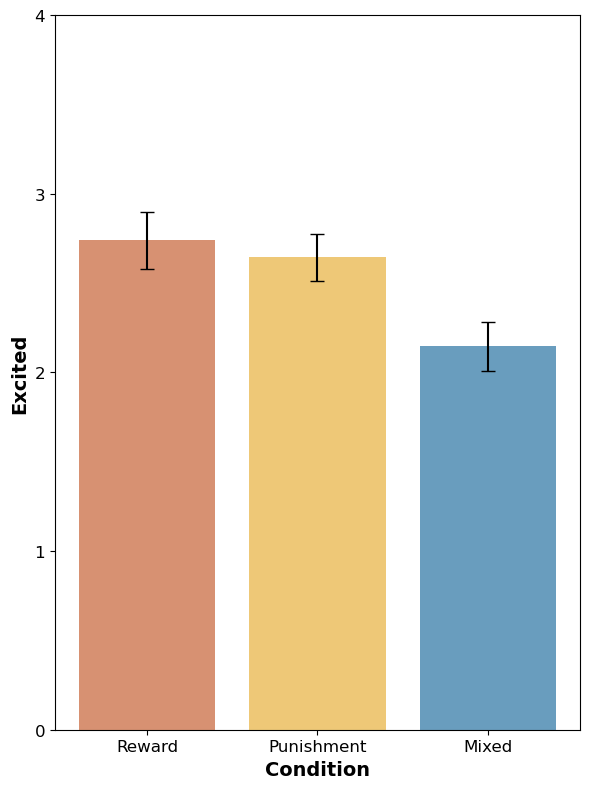

充满热情的
F-statistic: 5.311740563234081
P-value: 0.005984745134880042


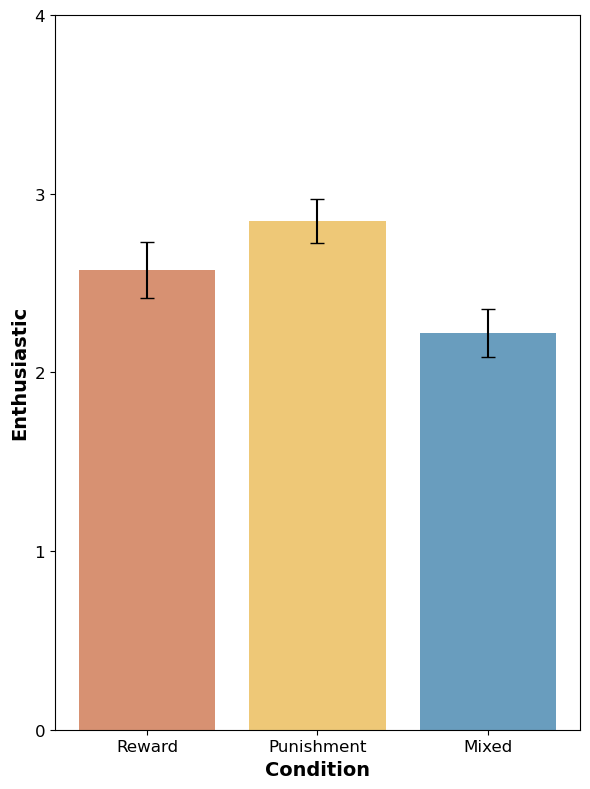

受鼓舞的
F-statistic: 6.0907752431218185
P-value: 0.002913146737253422


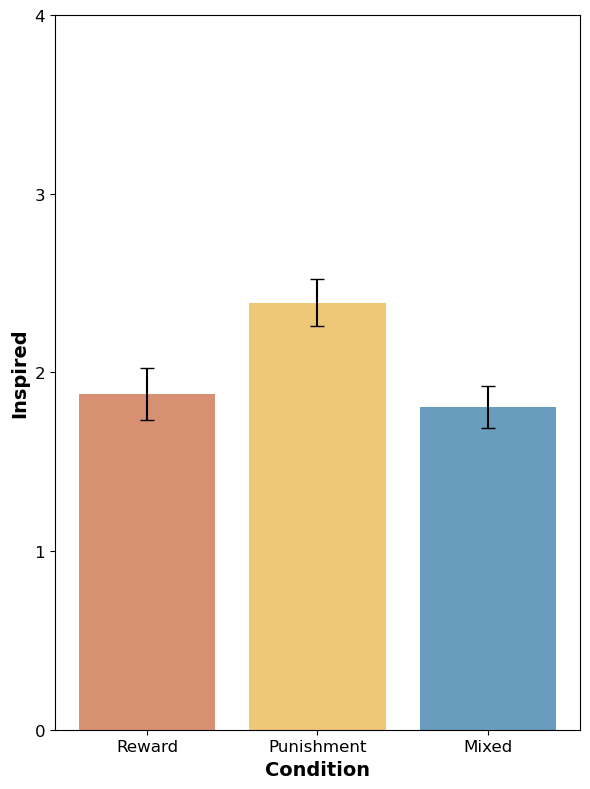

意志坚定的
F-statistic: 3.769810697299902
P-value: 0.025447878941538528


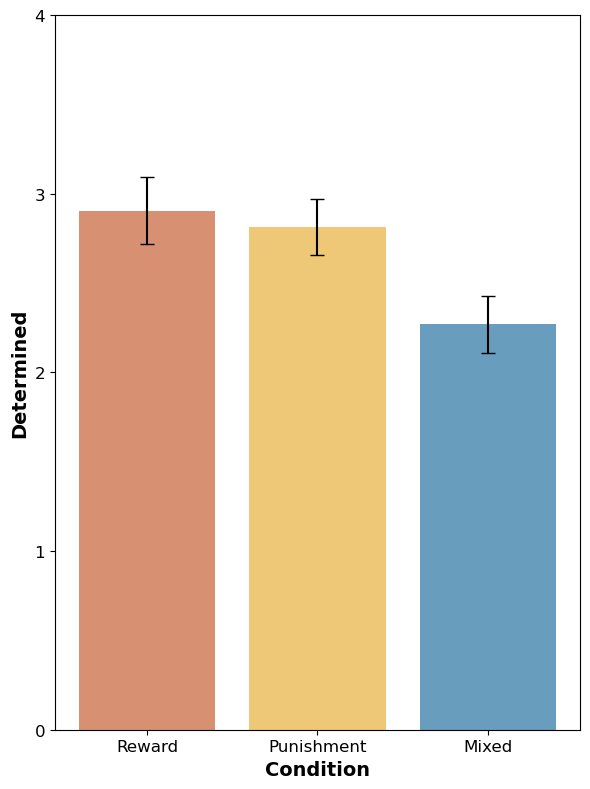

心神不宁的
F-statistic: 6.97539642513089
P-value: 0.0012977265909003579


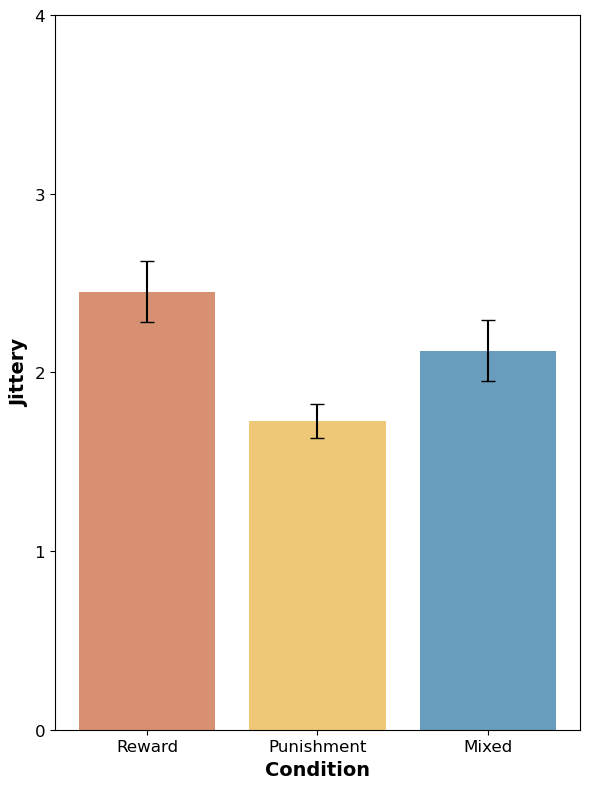

有活力的
F-statistic: 10.731989561718521
P-value: 4.6322114291375444e-05


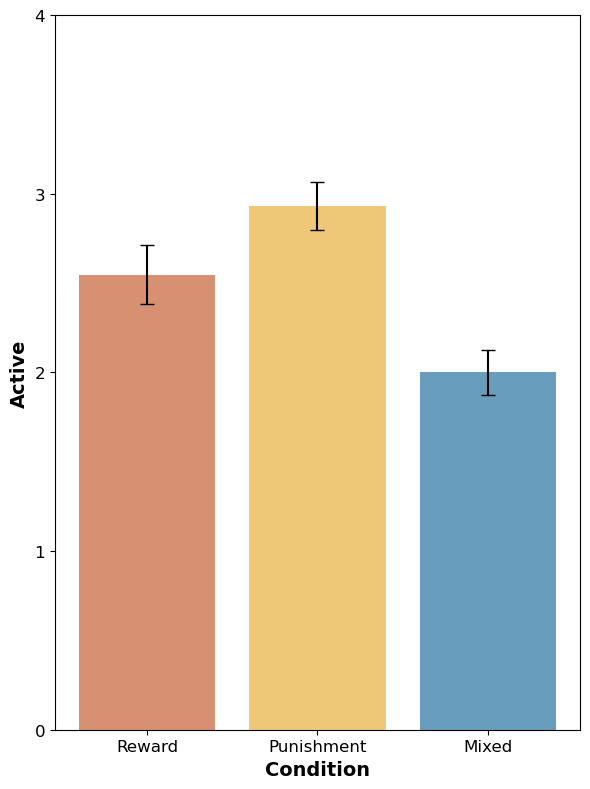

In [11]:
#比较三个条件下的情绪得分是否存在差异
my_dict_p = {}
emo = -1 

plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['legend.facecolor'] = 'white'

for ii in range(20):
    emo += 1
    col_nn = col_name_list_p[punish_emotion_list[ii]]

    emo_value_p = df_punish[col_nn]
    emo_value_r = df_reward[col_nn]
    emo_value_m = df_mixed[col_nn]
    data = {
    'Group1': emo_value_r,
    'Group2': emo_value_p,
    'Group3': emo_value_m
    }
    #df = pd.DataFrame.from_dict(data, orient='index').transpose()
    f_stat, p_val = f_oneway(emo_value_r, emo_value_p, emo_value_m)
   
    mean_emotion = [emo_value_r.mean(), emo_value_p.mean(), emo_value_m.mean()]
    sem_emotion = [emo_value_r.std(ddof=1) / np.sqrt(len(emo_value_r)),
                emo_value_p.std(ddof=1) / np.sqrt(len(emo_value_p)),
                emo_value_m.std(ddof=1) / np.sqrt(len(emo_value_m))]

    if p_val < 0.05:
        if p_val < 0.001:
            p_str = '< 0.001'
        else:
            p_str = f'{p_val:.3f}'
        
        print(col_nn)
        print("F-statistic:", f_stat)
        print("P-value:", p_val)
        
        fig, ax1 = plt.subplots(figsize=(6, 8))

        fig.patch.set_facecolor('white')
        ax1.set_facecolor('white')

        colors = ['#c66236','#e7b13e','#2a74a3']
        
        bars = ax1.bar([0, 1, 2], mean_emotion, yerr=sem_emotion, color=colors, alpha=0.7, label='Emotion Score', capsize=5)
        ax1.set_ylabel(emotion_list[emo], color='black', fontsize=14, weight='bold')
        
        ax1.set_xlabel('Condition', color='black', fontsize=14, weight='bold')
        ax1.tick_params('y', colors='black')

        bar_names = ['Reward', 'Punishment', 'Mixed']
    
        ax1.set_xticks([0, 1, 2])
        ax1.set_xticklabels(bar_names, color='black', fontsize=12)
        ax1.set_yticks([0, 1, 2,3,4])
        ax1.set_yticklabels([0, 1, 2,3,4], color='black', fontsize=12)

        fig.tight_layout()
        plt.show()

PANAS_Positive affect
F-statistic: 6.160913806245009
P-value: 0.0027312971584742465


c:\Users\18611\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\18611\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\18611\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


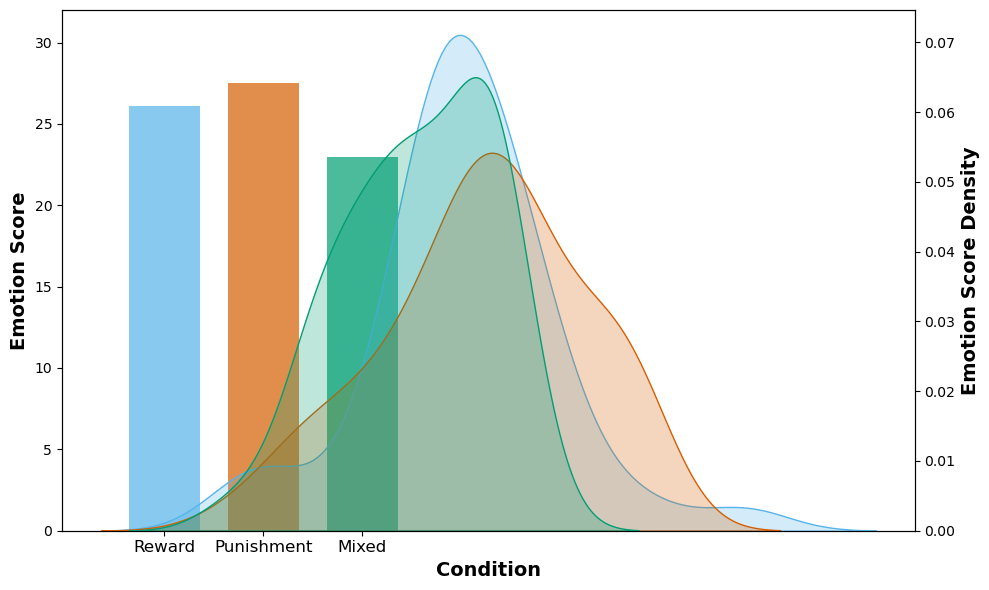

In [12]:
my_dict_p = {}
emo = 19

plt.style.use('default')
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['legend.facecolor'] = 'white'

for ii in range(20,23):
    emo += 1
    col_nn = col_name_list_p[punish_emotion_list[ii]]

    emo_value_p = df_punish[col_nn]
    emo_value_r = df_reward[col_nn]
    emo_value_m = df_mixed[col_nn]
    data = {
    'Group1': emo_value_r,
    'Group2': emo_value_p,
    'Group3': emo_value_m
    }
    #df = pd.DataFrame.from_dict(data, orient='index').transpose()
    f_stat, p_val = f_oneway(emo_value_r, emo_value_p, emo_value_m)
   
    if p_val < 0.05:
        if p_val < 0.001:
            p_str = '< 0.001'
        else:
            p_str = f' {p_val:.3f}'
        print(col_nn)
        print("F-statistic:", f_stat)
        print("P-value:", p_val)
        
        fig, ax1 = plt.subplots(figsize=(10, 6))

        # Setting background colors to white
        fig.patch.set_facecolor('white')
        ax1.set_facecolor('white')

        # Bar plot
        colors = ['#56B4E9', '#D55E00', '#009E73']
        
        mean_emotion = [emo_value_r.mean(), emo_value_p.mean(), emo_value_m.mean()]
        bars = ax1.bar([5, 12, 19], mean_emotion, color=colors, alpha=0.7, width= 5 ,label='Emotion Score')
        ax1.set_ylabel('Emotion Score', color='black', fontsize=14, weight='bold')
        ax1.set_ylim([0, 32])  # Adjusting y-limit for better visualization
        ax1.set_xlabel('Condition', color='black', fontsize=14, weight='bold')
        ax1.tick_params('y', colors='black')

        bar_names = ['Reward', 'Punishment', 'Mixed']
        ax1.set_xticks([5, 12, 19])
        #ax1.set_xticks([df['Group1'].dropna().mean(), df['Group2'].dropna().mean(), df['Group3'].dropna().mean()])
        ax1.set_xticklabels(bar_names,color = 'black', fontsize=12)
        # Twin axis
        ax2 = ax1.twinx()

        # Setting background color of twin axis to white
        ax2.set_facecolor('white')

        
        # Distribution plot
        sns.kdeplot(emo_value_r, ax=ax2, color=colors[0], fill=True, label='Distribution Group1')
        sns.kdeplot(emo_value_p, ax=ax2, color=colors[1], fill=True, label='Distribution Group2')
        sns.kdeplot(emo_value_m, ax=ax2, color=colors[2], fill=True, label='Distribution Group3')
        ax2.set_ylabel('Emotion Score Density', color='black', fontsize=14, weight='bold')
        ax2.tick_params('y', colors='black')

    
        
        
        # Title & Show the plot
        #plt.title(emotion_list[emo], fontsize=16, weight='bold',color = 'black')
        fig.tight_layout()
        plt.show()

In [14]:
accuracy_reward = np.zeros([len(sub_list_reward),3,3]) #sub * cond * stage 
accuracy_punish = np.zeros([len(sub_list_punishment),3,3]) #sub * cond * stage 
accuracy_mixed = np.zeros([len(sub_list_mixed),3,3]) #sub * cond * stage
# sub: 101 - 160 , #cond: 'enhance_lie', 'enhance_honesty', 'enhance_random', stage: 'pre', 'post', 'post2'

In [15]:
cond_list = cond_list_reward
stage_list = ['pre', 'post', 'post2']

In [16]:
o1 = -1 
for sub in sub_list_reward:
    o1 = o1 + 1 
    a = df_r_memory.loc[lambda df_r_memory:df_r_memory['subject_nr'] == sub]
    o2 = -1 
    for cond in cond_list:
        o2 = o2 + 1
        a_con = a.loc[lambda a:a['condition'] == cond]
        o3 = -1
        for stage in stage_list:
            o3 = o3 + 1 
            a_con_stage = a_con.loc[lambda a_con:a_con['stage'] == stage]
            accuracy_reward[o1,o2,o3] = a_con_stage['accuracy'].mean()
            
            
o1 = -1 
for sub in sub_list_punishment:
    o1 = o1 + 1 
    a = df_p_memory.loc[lambda df_p_memory:df_p_memory['subject_nr'] == sub]
    o2 = -1 
    for cond in cond_list:
        o2 = o2 + 1
        a_con = a.loc[lambda a:a['condition'] == cond]
        o3 = -1
        for stage in stage_list:
            o3 = o3 + 1 
            a_con_stage = a_con.loc[lambda a_con:a_con['stage'] == stage]
            accuracy_punish[o1,o2,o3] = a_con_stage['accuracy'].mean()
            
o1 = -1
for sub in sub_list_mixed:
    o1 = o1 + 1 
    a = df_m_memory.loc[lambda df_m_memory:df_m_memory['subject_nr'] == sub]
    o2 = -1 
    for cond in cond_list:
        o2 = o2 + 1
        a_con = a.loc[lambda a:a['condition'] == cond]
        o3 = -1
        for stage in stage_list:
            o3 = o3 + 1 
            a_con_stage = a_con.loc[lambda a_con:a_con['stage'] == stage]
            accuracy_mixed[o1,o2,o3] = a_con_stage['accuracy'].mean()
            
    

calculate meta value

In [17]:
meta_reward = np.zeros([len(sub_list_reward),3,3]) #sub * cond * stage 
meta_punish = np.zeros([len(sub_list_punishment),3,3]) #sub * cond * stage 
meta_mixed = np.zeros([len(sub_list_mixed),3,3]) #sub * cond * stage    

In [18]:
o1 = -1 
for sub in sub_list_reward:
    o1 = o1 + 1 
    a = df_r_memory.loc[lambda df_r_memory:df_r_memory['subject_nr'] == sub]
    o2 = -1 
    for cond in cond_list:
        o2 = o2 + 1
        a_con = a.loc[lambda a:a['condition'] == cond]
        o3 = -1
        for stage in stage_list:
            o3 = o3 + 1 
            a_con_stage = a_con.loc[lambda a_con:a_con['stage'] == stage]
            meta_reward[o1,o2,o3] = a_con_stage['meta'].mean()
            
            
o1 = -1 
for sub in sub_list_punishment:
    o1 = o1 + 1 
    a = df_p_memory.loc[lambda df_p_memory:df_p_memory['subject_nr'] == sub]
    o2 = -1 
    for cond in cond_list:
        o2 = o2 + 1
        a_con = a.loc[lambda a:a['condition'] == cond]
        o3 = -1
        for stage in stage_list:
            o3 = o3 + 1 
            a_con_stage = a_con.loc[lambda a_con:a_con['stage'] == stage]
            meta_punish[o1,o2,o3] = a_con_stage['meta'].mean()
o1 = -1
for sub in sub_list_mixed:
    o1 = o1 + 1 
    a = df_m_memory.loc[lambda df_m_memory:df_m_memory['subject_nr'] == sub]
    o2 = -1 
    for cond in cond_list:
        o2 = o2 + 1
        a_con = a.loc[lambda a:a['condition'] == cond]
        o3 = -1
        for stage in stage_list:
            o3 = o3 + 1 
            a_con_stage = a_con.loc[lambda a_con:a_con['stage'] == stage]
            meta_mixed[o1,o2,o3] = a_con_stage['meta'].mean()

In [19]:
col_name_list_r = df_reward.columns.values
col_name_list_p = df_punish.columns.values
col_name_list_m = df_mixed.columns.values

In [20]:
color_list = ['#70309f','#e7b13e','#2a74a3','#c66236','#00FFFF']

Calculate the correlation between the emotion and the accuracy. 

In [21]:
print('reward:')
print(cond_list_reward)

print('punishment:')
print(cond_list_punishment)

print('mixed:')
print(cond_list_mixed)

reward:
['enhance_honesty' 'enhance_lie' 'enhance_random']
punishment:
['enhance_honesty' 'enhance_lie' 'enhance_random']
mixed:
['enhance_honesty' 'enhance_lie' 'enhance_random']


In [45]:
## emotion score and enhance honesty (0)/enhance lie (1)/enhance random (2) memory meta change (reward condition)

cond_index = 1 #enhance honesty (0)/enhance lie (1)/enhance random (2)
meta_diff_p = meta_punish[:,cond_index,0] - meta_punish[:,cond_index,1] #pre-post
meta_diff_r = meta_reward[:,cond_index,0] - meta_reward[:,cond_index,1]
meta_diff_m = meta_mixed[:,cond_index,0] - meta_mixed[:,cond_index,1]


my_dict_R = {}
my_dict_p = {}
emo = -1
col = -1
for ii in reward_emotion_list:
    emo += 1
    col_nn = col_name_list_r[ii]
    score = np.ones([len(sub_list_reward),1])
    ord = -1 
    for sub in sub_list_reward:
        ord = ord + 1 
        sub_sc = df_reward[df_reward['被试编号（请询问主试）'] == sub][col_nn]
        
        score[ord] = sub_sc
        #r,p = stats.pearsonr(score.squeeze(),accr_diff_r)
    
        
    slope, intercept, r, p, stderr = stats.linregress(score.squeeze(), meta_diff_r) 
    
    
    
    if p < 0.051:
        print(col_nn)
        col = col + 1
        temp = pd.DataFrame({'emotion score': score.squeeze(), 'memory meta change': meta_diff_r })

        # Theme and settings
        sns.set_theme(style="whitegrid")
        plt.figure(figsize=(8, 6))

        # Regression plot
        sns.set_theme(style="white")  # Change from "whitegrid" to "white"
        plt.figure(figsize=(8, 6))
        ax = plt.gca()  # Get the current axis

        # Regression plot
        sns.regplot(x='emotion score', 
                    y='memory meta change', 
                    data=temp, 
                    scatter_kws={'s': 50, 'color':  '#c66236', 'alpha': 0.5}, 
                    line_kws={'color':'#c66236', 'lw': 2},
                    ax=ax)  # Specify the axis for the plot

        # Annotation for Pearson correlation
        corr, p_val = pearsonr(temp['emotion score'], temp['memory meta change'])
        print(f'Pearson correlation: {corr:.2f}, p-value: {p_val:.3f}')
        

        # Axes labels, title, and ticks
        ax.set_xlabel('Emotion Score', fontsize=14,weight='bold')
        ax.set_ylabel("Memory test meta value drop (pre - post)", fontsize=14,weight='bold')
        #ax.set_title("Relationship between Emotion Score and Memory Accuracy", fontsize=16, fontweight='bold')
        ax.set_xticks([1, 2, 3, 4])
        ax.set_xticklabels([1, 2, 3, 4])
        
        ax.grid(False)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)


        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        
        ax.spines['bottom'].set_linewidth(1.5)
        ax.spines['left'].set_linewidth(1.5)

        plt.tight_layout()
        plt.show()



    
    my_dict_R[col_nn] = r #相关
    my_dict_p[col_nn] = p #p值

In [47]:
## emotion score and enhance lie memory accuracy change (reward condition)

accr_diff_p = accuracy_punish[:,cond_index,0] - accuracy_punish[:,cond_index,1] # pre - post
accr_diff_r = accuracy_reward[:,cond_index,0] - accuracy_reward[:,cond_index,1]
accr_diff_m = accuracy_mixed[:,cond_index,0] - accuracy_mixed[:,cond_index,1]

my_dict_R = {}
my_dict_p = {}
emo = -1
col = -1
for ii in reward_emotion_list:
    emo += 1
    col_nn = col_name_list_r[ii]
    score = np.ones([len(sub_list_reward),1])
    ord = -1 
    for sub in sub_list_reward:
        ord = ord + 1 
        sub_sc = df_reward[df_reward['被试编号（请询问主试）'] == sub][col_nn]
        
        score[ord] = sub_sc
        #r,p = stats.pearsonr(score.squeeze(),accr_diff_r)
    
        
    slope, intercept, r, p, stderr = stats.linregress(score.squeeze(), accr_diff_r) 
    
    
    
    if p < 0.06:
        print(col_nn)
        col = col + 1
        temp = pd.DataFrame({'emotion score': score.squeeze(), 'memory accuracy change': accr_diff_r * 100 })

        # Theme and settings
        sns.set_theme(style="whitegrid")
        plt.figure(figsize=(8, 6))

        # Regression plot
        sns.set_theme(style="white")  # Change from "whitegrid" to "white"
        plt.figure(figsize=(8, 6))
        ax = plt.gca()  # Get the current axis

        # Regression plot
        sns.regplot(x='emotion score', 
                    y='memory accuracy change', 
                    data=temp, 
                    scatter_kws={'s': 50, 'color':  'gray', 'alpha': 0.5}, 
                    line_kws={'color': color_list[col], 'lw': 2},
                    ax=ax)  # Specify the axis for the plot

        # Annotation for Pearson correlation
        corr, p_val = pearsonr(temp['emotion score'], temp['memory accuracy change'])
        
        if p_val < 0.001:
            p_str = '< 0.001'
        else:
            p_str = f' {p_val:.3f}'
        plt.annotate(f'r = {corr:.2f}\np = {p_str}',
                    xy=(0.1, 0.9),  # Adjust this as needed
                    xycoords="axes fraction", 
                    fontsize=14, 
                    fontweight='bold')

        # Axes labels, title, and ticks
        ax.set_xlabel(emotion_list[emo], fontsize=14,weight='bold')
        ax.set_ylabel("Memory Accuracy Change (%)", fontsize=14,weight='bold')
        #ax.set_title("Relationship between Emotion Score and Memory Accuracy", fontsize=16, fontweight='bold')
        ax.set_xticks([1, 2, 3, 4, 5])
        ax.set_xticklabels([1, 2, 3, 4, 5])
        
        ax.set_yticks([-8,  -4,  0 ,4 ,8])
        ax.set_yticklabels([-8,  -4,  0 ,4 ,8])

        # Remove the grid lines
        ax.grid(False)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        # Set ticks position to left and bottom
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        
        ax.spines['bottom'].set_linewidth(1.5)
        ax.spines['left'].set_linewidth(1.5)
        
        #ax.tick_params(axis='x', direction='in')
        #ax.tick_params(axis='y', direction='in')

        # Show the plot
        plt.tight_layout()
        plt.show()



    
    my_dict_R[col_nn] = r
    my_dict_p[col_nn] = p

27
坐立不安的
[1. 1. 2. 2. 3. 1. 2. 1. 1. 3. 2. 2. 2. 3. 1. 2. 2. 2. 1. 2. 1. 3. 3. 1.
 1. 2. 2. 1. 1. 3. 2. 2. 2. 2. 2. 1. 1. 1. 5. 1. 2. 2. 2. 2. 1. 1. 3. 2.
 2. 2. 1. 1. 2. 2. 3.]
0.2850022949897478
0.03494089240764995


<Figure size 800x600 with 0 Axes>

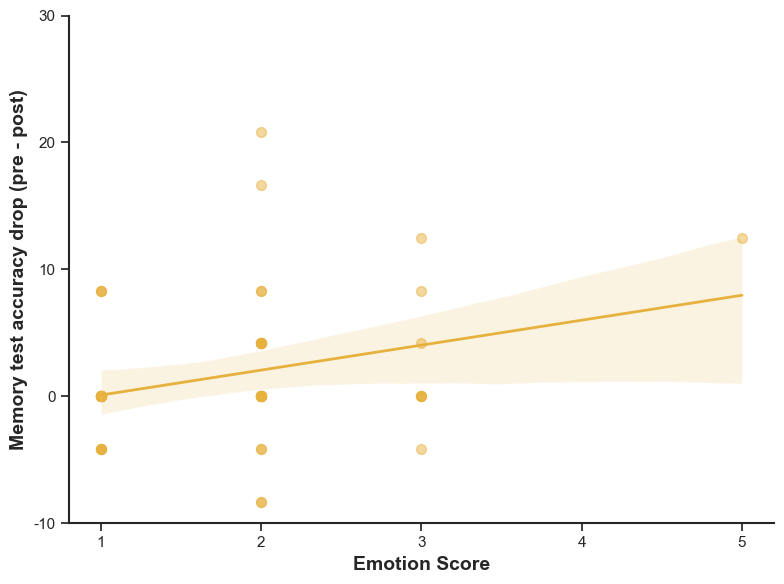

In [57]:
## emotion score and enhance lie memory accuracy change (punishment condition)

my_dict_R = {}
my_dict_p = {}
emo = -1
col = -1
for ii in punish_emotion_list:
    emo += 1
    col_nn = col_name_list_p[ii]
    score = np.ones([len(sub_list_punishment),1])
    ord = -1 
    for sub in sub_list_punishment:
        ord = ord + 1 
        sub_sc = df_punish[df_punish['被试编号（请询问主试）'] == sub][col_nn]
        
        score[ord] = sub_sc
        #r,p = stats.pearsonr(score.squeeze(),accr_diff_r)
    
        
    slope, intercept, r, p, stderr = stats.linregress(score.squeeze(), accr_diff_p) 
    
    
    
    if p < 0.05:
        print(ii)
        print(col_nn)
        print(score.squeeze())
        col = col + 1
        temp = pd.DataFrame({'emotion score': score.squeeze(), 'memory accuracy change': accr_diff_p * 100 })

        # Theme and settings
        sns.set_theme(style="whitegrid")
        plt.figure(figsize=(8, 6))

        # Regression plot
        sns.set_theme(style="white")  # Change from "whitegrid" to "white"
        plt.figure(figsize=(8, 6))
        ax = plt.gca()  # Get the current axis

        # Regression plot
        sns.regplot(x='emotion score', 
                    y='memory accuracy change', 
                    data=temp, 
                    scatter_kws={'s': 50, 'color':  '#e7b13e', 'alpha': 0.5}, 
                    line_kws={'color': '#e7b13e', 'lw': 2},
                    ax=ax)  # Specify the axis for the plot

        # Annotation for Pearson correlation
        corr, p_val = pearsonr(temp['emotion score'], temp['memory accuracy change'])
        print(corr)
        print(p_val)
        # Axes labels, title, and ticks
        ax.set_xlabel('Emotion Score', fontsize=14,weight='bold')
        ax.set_ylabel("Memory test accuracy drop (pre - post)", fontsize=14,weight='bold')
        #ax.set_title("Relationship between Emotion Score and Memory Accuracy", fontsize=16, fontweight='bold')
        ax.set_xticks([1, 2, 3, 4, 5])
        ax.set_xticklabels([1, 2, 3, 4, 5])
        
        ax.set_yticks([-10,  0,  10 ,20 ,30])
        ax.set_yticklabels([-10,  0,  10 ,20 ,30])

        # Remove the grid lines
        ax.grid(False)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        # Set ticks position to left and bottom
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        
        ax.spines['bottom'].set_linewidth(1.5)
        ax.spines['left'].set_linewidth(1.5)
        
        #ax.tick_params(axis='x', direction='in')
        #ax.tick_params(axis='y', direction='in')

        # Show the plot
        plt.tight_layout()
        plt.show()



    
    my_dict_R[col_nn] = r
    my_dict_p[col_nn] = p

坐立不安的
0.27494855122057144
0.04219653847715796


<Figure size 800x600 with 0 Axes>

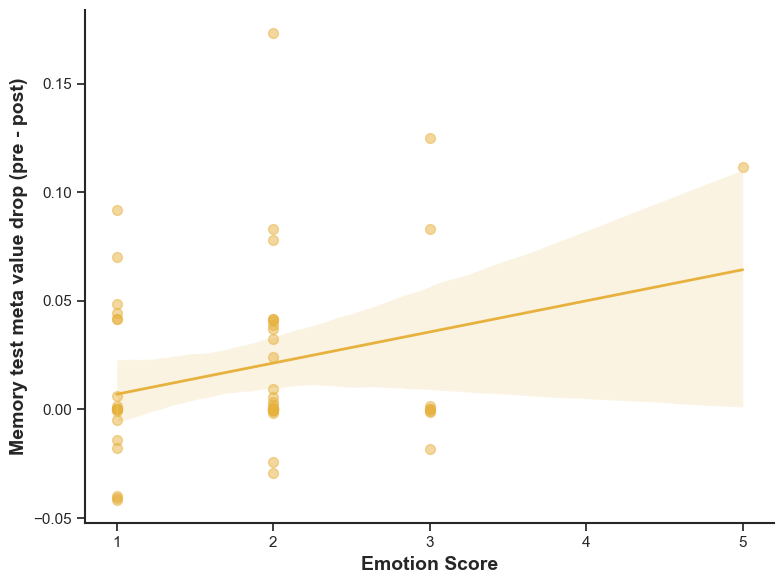

In [52]:
## emotion score and enhance lie memory meta change (punishment condition)
my_dict_R = {}
my_dict_p = {}
emo = -1
col = -1
for ii in punish_emotion_list:
    emo += 1
    col_nn = col_name_list_p[ii]
    score = np.ones([len(sub_list_punishment),1])
    ord = -1 
    for sub in sub_list_punishment:
        ord = ord + 1 
        sub_sc = df_punish[df_punish['被试编号（请询问主试）'] == sub][col_nn]
        
        score[ord] = sub_sc
        #r,p = stats.pearsonr(score.squeeze(),accr_diff_r)
    
        
    slope, intercept, r, p, stderr = stats.linregress(score.squeeze(), meta_diff_p) 
    
    
    
    if p < 0.06:
        print(col_nn)
        col = col + 1
        temp = pd.DataFrame({'emotion score': score.squeeze(), 'memory meta change': meta_diff_p })

        # Theme and settings
        sns.set_theme(style="whitegrid")
        plt.figure(figsize=(8, 6))

        # Regression plot
        sns.set_theme(style="white")  # Change from "whitegrid" to "white"
        plt.figure(figsize=(8, 6))
        ax = plt.gca()  # Get the current axis

        # Regression plot
        sns.regplot(x='emotion score', 
                    y='memory meta change', 
                    data=temp, 
                    scatter_kws={'s': 50, 'color':  '#e7b13e', 'alpha': 0.5}, 
                    line_kws={'color': '#e7b13e', 'lw': 2},
                    ax=ax)  # Specify the axis for the plot

        # Annotation for Pearson correlation
        corr, p_val = pearsonr(temp['emotion score'], temp['memory meta change'])
        print(corr)
        print(p_val)

        # Axes labels, title, and ticks
        ax.set_xlabel('Emotion Score', fontsize=14,weight='bold')
        ax.set_ylabel("Memory test meta value drop (pre - post)", fontsize=14,weight='bold')
        #ax.set_title("Relationship between Emotion Score and Memory Accuracy", fontsize=16, fontweight='bold')
        ax.set_xticks([1, 2, 3, 4, 5])
        ax.set_xticklabels([1, 2, 3, 4, 5])
        
        #ax.set_yticks([-10,  0,  10 ,20 ,30])
        #ax.set_yticklabels([-10,  0,  10 ,20 ,30])

        # Remove the grid lines
        ax.grid(False)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        # Set ticks position to left and bottom
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        
        ax.spines['bottom'].set_linewidth(1.5)
        ax.spines['left'].set_linewidth(1.5)
        
        #ax.tick_params(axis='x', direction='in')
        #ax.tick_params(axis='y', direction='in')

        # Show the plot
        plt.tight_layout()
        plt.show()



    
    my_dict_R[col_nn] = r
    my_dict_p[col_nn] = p

坐立不安的
0.3720685851261931
0.016600803662051005


<Figure size 800x600 with 0 Axes>

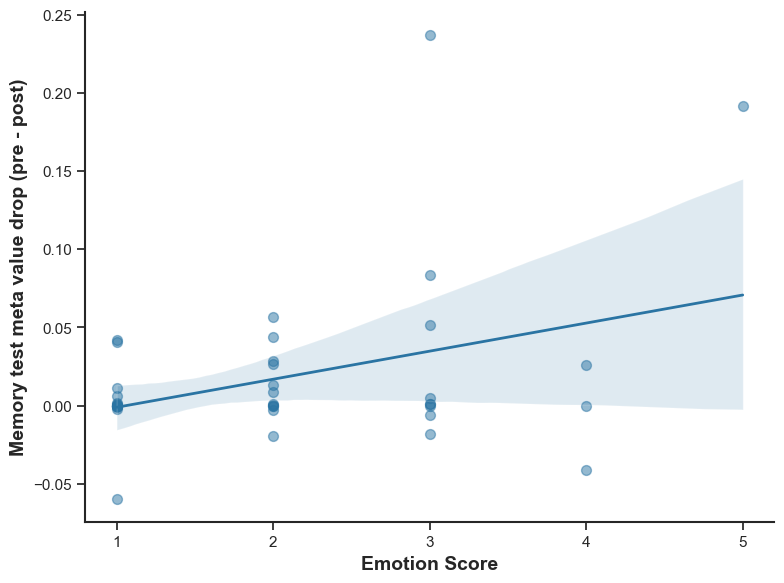

有活力的
0.29802513159897404
0.05841970905301392


<Figure size 800x600 with 0 Axes>

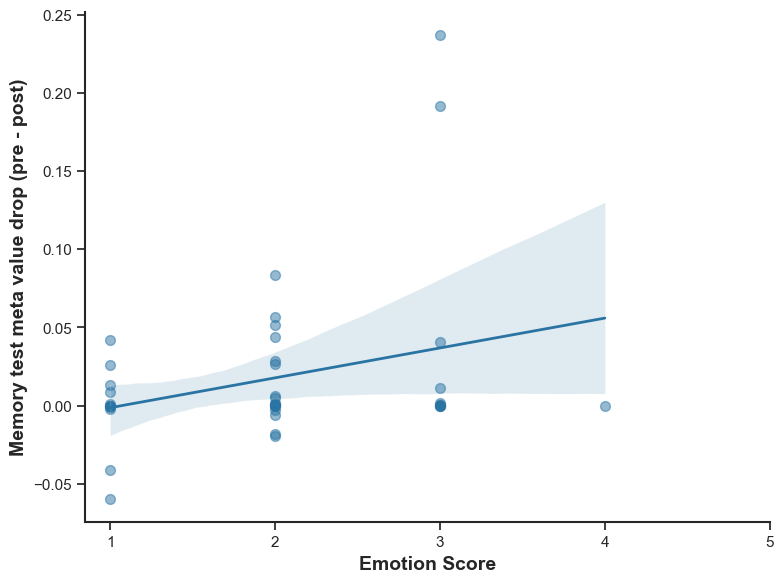

In [53]:
## emotion score and enhance lie memory meta change (mixed condition)
my_dict_R = {}
my_dict_p = {}
emo = -1
col = -1
for ii in mixed_emotion_list:
    emo += 1
    col_nn = col_name_list_m[ii]
    score = np.ones([len(sub_list_mixed),1])
    ord = -1 
    for sub in sub_list_mixed:
        ord = ord + 1 
        sub_sc = df_mixed[df_mixed['被试编号（请询问主试）'] == sub][col_nn]
        
        score[ord] = sub_sc
        #r,p = stats.pearsonr(score.squeeze(),accr_diff_r)
    
        
    slope, intercept, r, p, stderr = stats.linregress(score.squeeze(), meta_diff_m) 
    
    if p < 0.06:
        print(col_nn)
        col = col + 1
        temp = pd.DataFrame({'emotion score': score.squeeze(), 'memory meta change': meta_diff_m})

        # Theme and settings
        sns.set_theme(style="whitegrid")
        plt.figure(figsize=(8, 6))

        # Regression plot
        sns.set_theme(style="white")  # Change from "whitegrid" to "white"
        plt.figure(figsize=(8, 6))
        ax = plt.gca()  # Get the current axis

        # Regression plot
        sns.regplot(x='emotion score', 
                    y='memory meta change', 
                    data=temp, 
                    scatter_kws={'s': 50, 'color':  '#2a74a3', 'alpha': 0.5}, 
                    line_kws={'color': '#2a74a3', 'lw': 2},
                    ax=ax)  # Specify the axis for the plot

        # Annotation for Pearson correlation
        corr, p_val = pearsonr(temp['emotion score'], temp['memory meta change'])
        print(corr)
        print(p_val)

        # Axes labels, title, and ticks
        ax.set_xlabel('Emotion Score', fontsize=14,weight='bold')
        ax.set_ylabel("Memory test meta value drop (pre - post)", fontsize=14,weight='bold')
        #ax.set_title("Relationship between Emotion Score and Memory Accuracy", fontsize=16, fontweight='bold')
        ax.set_xticks([1, 2, 3, 4, 5])
        ax.set_xticklabels([1, 2, 3, 4, 5])
        
        #ax.set_yticks([-8,  -4,  0 ,4 ,8])
        #ax.set_yticklabels([-8,  -4,  0 ,4 ,8])

        # Remove the grid lines
        ax.grid(False)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        # Set ticks position to left and bottom
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        
        ax.spines['bottom'].set_linewidth(1.5)
        ax.spines['left'].set_linewidth(1.5)
\
        plt.tight_layout()
        plt.show()

In [54]:
## emotion score and enhance lie memory accuracy change (mixed condition)
my_dict_R = {}
my_dict_p = {}
emo = -1
col = -1
for ii in mixed_emotion_list:
    emo += 1
    col_nn = col_name_list_m[ii]
    score = np.ones([len(sub_list_mixed),1])
    ord = -1 
    for sub in sub_list_mixed:
        ord = ord + 1 
        sub_sc = df_mixed[df_mixed['被试编号（请询问主试）'] == sub][col_nn]
        
        score[ord] = sub_sc
        #r,p = stats.pearsonr(score.squeeze(),accr_diff_r)
    
        
    slope, intercept, r, p, stderr = stats.linregress(score.squeeze(), accr_diff_m) 
    
    if p < 0.06:
        print(col_nn)
        col = col + 1
        temp = pd.DataFrame({'emotion score': score.squeeze(), 'memory accuracy change': accr_diff_m * 100})

        # Theme and settings
        sns.set_theme(style="whitegrid")
        plt.figure(figsize=(8, 6))

        # Regression plot
        sns.set_theme(style="white")  # Change from "whitegrid" to "white"
        plt.figure(figsize=(8, 6))
        ax = plt.gca()  # Get the current axis

        # Regression plot
        sns.regplot(x='emotion score', 
                    y='memory accuracy change', 
                    data=temp, 
                    scatter_kws={'s': 50, 'color':  '#2a74a3', 'alpha': 0.5}, 
                    line_kws={'color':  '#2a74a3', 'lw': 2},
                    ax=ax)  # Specify the axis for the plot

        # Annotation for Pearson correlation
        corr, p_val = pearsonr(temp['emotion score'], temp['memory accuracy change'])
        

        # Axes labels, title, and ticks
        ax.set_xlabel('Emotion Score', fontsize=14,weight='bold')
        ax.set_ylabel("Memory test accuracy drop (pre - post)", fontsize=14,weight='bold')
        #ax.set_title("Relationship between Emotion Score and Memory Accuracy", fontsize=16, fontweight='bold')
        ax.set_xticks([1, 2, 3, 4, 5])
        ax.set_xticklabels([1, 2, 3, 4, 5])
        
        ax.set_yticks([-8,  -4,  0 ,4 ,8])
        ax.set_yticklabels([-8,  -4,  0 ,4 ,8])

        # Remove the grid lines
        ax.grid(False)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        # Set ticks position to left and bottom
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        
        ax.spines['bottom'].set_linewidth(1.5)
        ax.spines['left'].set_linewidth(1.5)
        
        #ax.tick_params(axis='x', direction='in')
        #ax.tick_params(axis='y', direction='in')

        # Show the plot
        plt.tight_layout()
        plt.show()
    my_dict_R[col_nn] = r
    my_dict_p[col_nn] = p

believe 与 情绪

In [55]:
df_reward = df_reward.drop(df_reward.index[[15, 21, 22]]) #no belief score
sub_list_reward = df_reward['被试编号（请询问主试）'].unique()

In [ ]:
be_sc_r = df_reward['请问你相信本实验中另外一方存在的程度如何？']
be_sc_p = df_punish['请问你相信本实验中另外一方存在的程度如何？']
be_sc_m = df_mixed['请问你相信本实验中另外一方存在的程度如何？']

In [ ]:
my_dict_bR = {}
my_dict_bp = {}
emo = -1
col = -1
for ii in reward_emotion_list:
    emo += 1
    col_nn = col_name_list_r[ii]
    score = np.ones([len(sub_list_reward),1])
    bl_score = np.ones([len(sub_list_reward),1])
    ord = -1 
    for sub in sub_list_reward:
        ord = ord + 1 
        sub_sc = df_reward[df_reward['被试编号（请询问主试）'] == sub][col_nn]
        sub_bl_sc = df_reward[df_reward['被试编号（请询问主试）'] == sub]['请问你相信本实验中另外一方存在的程度如何？']
        
        score[ord] = sub_sc
        bl_score[ord] = sub_bl_sc
        
    slope, intercept, r, p, stderr = stats.linregress(score.squeeze(), bl_score.squeeze()) 
    
    if p < 0.06:
        col = col + 1
        
        
        temp = pd.DataFrame({'emotion score':score.squeeze(),'believe score':bl_score.squeeze()})
        sns.set_theme(style="whitegrid")
        plt.figure(figsize=(8, 6))
        ax = plt.gca()  # Get the current axis

        # Regression plot
        sns.regplot(x='emotion score', 
                    y='believe score', 
                    data=temp, 
                    scatter_kws={'s': 50, 'color':  'gray', 'alpha': 0.5}, 
                    line_kws={'color': color_list[col], 'lw': 2},
                    ax=ax)  # Specify the axis for the plot

        # Annotation for Pearson correlation
        corr, p_val = pearsonr(temp['emotion score'], temp['believe score'])
        
        if p_val < 0.001:
            p_str = '< 0.001'
        else:
            p_str = f' {p_val:.3f}'
        plt.annotate(f'r = {corr:.2f}\np = {p_str}',
                    xy=(0.1, 0.9),  # Adjust this as needed
                    xycoords="axes fraction", 
                    fontsize=14, 
                    fontweight='bold')

        # Axes labels, title, and ticks
        ax.set_xlabel(emotion_list[emo], fontsize=14,weight='bold')
        ax.set_ylabel("Believe score", fontsize=14,weight='bold')
        #ax.set_title("Relationship between Emotion Score and Memory Accuracy", fontsize=16, fontweight='bold')
        if emo > len(reward_emotion_list) - 4 :  
            ax.set_xticks([10, 20, 30, 40, 50])
            ax.set_xticklabels([10, 20, 30, 40, 50])
            
            ax.set_yticks([0,20,40,60,80,100])
            ax.set_yticklabels([0,20,40,60,80,100])
        else:
            ax.set_xticks([1, 2, 3, 4, 5])
            ax.set_xticklabels([1, 2, 3, 4, 5])
            
            ax.set_yticks([0,20,40,60,80,100])
            ax.set_yticklabels([0,20,40,60,80,100])

        # Remove the grid lines
        ax.grid(False)
        
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

        # Set ticks position to left and bottom
        ax.yaxis.set_ticks_position('left')
        ax.xaxis.set_ticks_position('bottom')
        
        ax.spines['bottom'].set_linewidth(1.5)
        ax.spines['left'].set_linewidth(1.5)
        
        #ax.tick_params(axis='x', direction='in')
        #ax.tick_params(axis='y', direction='in')

        # Show the plot
        plt.tight_layout()
        plt.show()
        print(col_nn)
        print(corr)
        
        

        
    #r,p = stats.pearsonr(score.squeeze(),bl_score.squeeze())
    

In [ ]:
my_dict_bR = {}
my_dict_bp = {}
for ii in punish_emotion_list:
    col_nn = col_name_list_p[ii]
    score = np.ones([len(sub_list_punishment),1])
    bl_score = np.ones([len(sub_list_punishment),1])
    ord = -1 
    for sub in sub_list_punishment:
        ord = ord + 1 
        sub_sc = df_punish[df_punish['被试编号（请询问主试）'] == sub][col_nn]
        sub_bl_sc = df_punish[df_punish['被试编号（请询问主试）'] == sub]['请问你相信本实验中另外一方存在的程度如何？']
        
        score[ord] = sub_sc
        bl_score[ord] = sub_bl_sc
        
    slope, intercept, r, p, stderr = stats.linregress(score.squeeze(), bl_score.squeeze()) 
    
    if p < 0.06:
        fig, ax = plt.subplots()
        fig.set_facecolor('white')
        ax.set_facecolor('white')
        ax.spines['bottom'].set_color('black')
    #    ax.spines['top'].set_color('black')
        ax.spines['left'].set_color('black')
    #    ax.spines['right'].set_color('black')
    
        ax.tick_params(axis='both', colors='black')
        ax.xaxis.label.set_color('black')
        ax.yaxis.label.set_color('black')
        ax.plot(score.squeeze(), bl_score.squeeze(), linewidth=0, marker='s', label='Data points')
        ax.plot(score.squeeze(), intercept + slope * score.squeeze())
        ax.set_xlabel('score')
        ax.set_ylabel('Believe score')
        ax.legend(facecolor='black')

        
    #r,p = stats.pearsonr(score.squeeze(),bl_score.squeeze())
    
    my_dict_bR[col_nn] = r
    my_dict_bp[col_nn] = p